# Load classification Results

In [14]:
import pickle
from discovery.class_analysis import run_lib
from discovery.class_analysis import datatypes
import numpy as np
from importlib import reload
from discovery.utils import filesys

import pandas as pd
import os
import dataclasses
import matplotlib.pyplot as plt

run_lib = reload(run_lib)
filesys = reload(filesys)
datatypes = reload(datatypes)

filesys.set_directory_in_project()


Changed working directory to /Users/szepi1991/Code/discovery


'/Users/szepi1991/Code/discovery'

In [15]:
def df_with_flat_settings(results: dict):
    return pd.DataFrame([
        dataclasses.asdict(k) | dataclasses.asdict(v)
        for k, v in results.items()
    ])


In [16]:
def store_df_as_csv(path_to_res_file, df):
    head, tail = os.path.split(path_to_res_file)
    assert tail.endswith(".pkl")
    csv_name = tail[:-4] + "_from_notebook.csv"
    save_to = os.path.join(head, csv_name)
    print("Saving to", save_to)
    df.to_csv(save_to, index=False)

# Minigrid

In [17]:
filesys.set_directory_in_project()
TWO_ROOMS_PATH = "discovery/class_analysis/two_rooms_RESULTS.pkl"
TWO_ROOMS_PATH = "discovery/class_analysis/two_rooms_RESULTS_TEST.pkl"
# TWO_ROOMS_PATH = "discovery/class_analysis/two_rooms_RESULTS_old.pkl"
# TWO_ROOMS_PATH = "discovery/class_analysis/two_rooms_RESULTS_less_old.pkl"

two_rooms_results = run_lib.load_existing_results(TWO_ROOMS_PATH)
for setting, data in two_rooms_results.items():
    print("setting:", setting)
    print("  num_runs: ", data.num_runs)
    print("  lin_acc_mean +- stderr: ", data.lin_acc_mean, "+-", data.lin_acc_std_err)
    print("  nonlin_acc_mean +- stderr: ", data.nonlin_acc_mean, "+-", data.nonlin_acc_std_err)
    print("  lin_sg_acc: ", data.lin_sg_acc_mean, "+-", data.lin_sg_acc_std_err)
    print("  nonlin_sg_acc: ", data.nonlin_sg_acc_mean, "+-", data.nonlin_sg_acc_std_err)
    print("  lin_non_sg_acc: ", data.lin_non_sg_acc_mean, "+-", data.lin_non_sg_acc_std_err)
    print("  nonlin_non_sg_acc: ", data.nonlin_non_sg_acc_mean, "+-", data.nonlin_non_sg_acc_std_err)



Changed working directory to /Users/szepi1991/Code/discovery
setting: Setting(multitask=False, model_type=<ModelType.CNN: 1>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.8684931506849315 +- 0.03581707188469899
  nonlin_acc_mean +- stderr:  0.9688356164383561 +- 0.007883781818569512
  lin_sg_acc:  0.6125 +- 0.08565008756562947
  nonlin_sg_acc:  0.5 +- 0.0
  lin_non_sg_acc:  0.8720486111111111 +- 0.03687368808479207
  nonlin_non_sg_acc:  0.9444444444444444 +- 0.0
setting: Setting(multitask=False, model_type=<ModelType.FTA: 2>, env_name=<EnvName.TwoRooms: 1>)
  num_runs:  20
  lin_acc_mean +- stderr:  0.9563356164383563 +- 0.0039337003450890876
  nonlin_acc_mean +- stderr:  0.9960616438356166 +- 0.0021965247248675332
  lin_sg_acc:  1.0 +- 0.0
  nonlin_sg_acc:  1.0 +- 0.0
  lin_non_sg_acc:  0.9557291666666666 +- 0.003988335072104217
  nonlin_non_sg_acc:  1.0 +- 0.0
setting: Setting(multitask=True, model_type=<ModelType.CNN: 1>, env_name=<EnvName.TwoRooms: 1

In [18]:
df_two_rooms = df_with_flat_settings(two_rooms_results)
df_two_rooms

,multitask,model_type,env_name,wandb_ids,num_runs,lin_accuracies,lin_sg_accuracies,lin_non_sg_accuracies,lin_conf_matrices,lin_acc_mean,...,nonlin_accuracies,nonlin_sg_accuracies,nonlin_non_sg_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err,nonlin_sg_acc_mean,nonlin_sg_acc_std_err,nonlin_non_sg_acc_mean,nonlin_non_sg_acc_std_err
0,False,ModelType.CNN,EnvName.TwoRooms,"[arciq5xu, 5cc1cxom, 5li84sl8, 8xcxbyb0, hpx0v...",20,"[0.3801369863013699, 0.8493150684931506, 0.952...","[0.75, 1.0, 0.75, 0.75, 0.5, 1.0, 0.0, 0.0, 0....","[0.375, 0.8472222222222222, 0.9548611111111112...","[[[108, 180], [1, 3]], [[244, 44], [0, 4]], [[...",0.868493,...,"[0.9383561643835616, 0.8664383561643836, 0.986...",[0.5],[0.9444444444444444],"[[[272, 16], [2, 2]], [[249, 39], [0, 4]], [[2...",0.968836,0.007884,0.5,0.0,0.944444,0.0
1,False,ModelType.FTA,EnvName.TwoRooms,"[1itlnbj2, tgqdhch8, jaq1ddx8, 8oppyosv, pt6ti...",20,"[0.9623287671232876, 0.9657534246575342, 0.969...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9618055555555556, 0.9652777777777778, 0.968...","[[[277, 11], [0, 4]], [[278, 10], [0, 4]], [[2...",0.956336,...,"[1.0, 1.0, 1.0, 0.9965753424657534, 0.99657534...",[1.0],[1.0],"[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.996062,0.002197,1.0,0.0,1.000000,0.0
2,True,ModelType.CNN,EnvName.TwoRooms,"[dtg6kyjm, m0gi183a, f296q1jm, gmfzhi6v, ff86z...",20,"[0.9726027397260274, 0.934931506849315, 0.6609...","[0.75, 1.0, 0.75, 0.0, 0.75, 1.0, 1.0, 0.5, 0....","[0.9756944444444444, 0.9340277777777778, 0.659...","[[[281, 7], [1, 3]], [[269, 19], [0, 4]], [[19...",0.910959,...,"[0.9931506849315068, 0.9794520547945206, 0.969...",[1.0],[0.9930555555555556],"[[[286, 2], [0, 4]], [[282, 6], [0, 4]], [[280...",0.975685,0.003110,1.0,0.0,0.993056,0.0
3,True,ModelType.FTA,EnvName.TwoRooms,"[dcmh4m19, uj21ts7a, 1p9hrhke, 2ulxxriq, 04wn5...",20,"[0.9863013698630136, 0.9828767123287672, 0.996...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9861111111111112, 0.9826388888888888, 0.996...","[[[284, 4], [0, 4]], [[283, 5], [0, 4]], [[287...",0.980479,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9965753424657534, ...",[1.0],[1.0],"[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.999829,0.000167,1.0,0.0,1.000000,0.0
4,True,ModelType.RANDOM_PROJ_GAUSS,EnvName.TwoRooms,"[None, None, None, None, None, None, None, Non...",20,"[0.9794520547945206, 0.9212328767123288, 0.732...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9791666666666666, 0.9201388888888888, 0.729...","[[[282, 6], [0, 4]], [[265, 23], [0, 4]], [[21...",0.940068,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[1.0],[1.0],"[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",0.999829,0.000167,1.0,0.0,1.000000,0.0
5,True,ModelType.RANDOM_PROJ_SPARSE,EnvName.TwoRooms,"[None, None, None, None, None, None, None, Non...",20,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",1.000000,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[1.0],[1.0],"[[[288, 0], [0, 4]], [[288, 0], [0, 4]], [[288...",1.000000,0.000000,1.0,0.0,1.000000,0.0


In [19]:
label_mapping = {
    (False, datatypes.ModelType.FTA): "Single-Task; FTA",
    (False, datatypes.ModelType.CNN): "Single-Task; CNN",
    (True, datatypes.ModelType.FTA): "Multi-Task; FTA",
    (True, datatypes.ModelType.CNN): "Multi-Task; CNN",
    (True, datatypes.ModelType.RANDOM_PROJ_GAUSS): "Random Gaussian Proj.",
    (True, datatypes.ModelType.RANDOM_PROJ_SPARSE): "Random Sparse Proj.",
}

def clean_df(df, label_mapping):

    df_clean = df.loc[:, (
        "multitask", "model_type",
        "lin_acc_mean", "lin_acc_std_err",
        "lin_sg_acc_mean", "lin_sg_acc_std_err",
        "lin_non_sg_acc_mean", "lin_non_sg_acc_std_err",
        "nonlin_acc_mean", "nonlin_acc_std_err",
        "nonlin_sg_acc_mean", "nonlin_sg_acc_std_err",
        "nonlin_non_sg_acc_mean", "nonlin_non_sg_acc_std_err"
    )]

    df_clean["label"] = df_clean.apply(
        lambda row: label_mapping[(row["multitask"], row["model_type"])], axis=1
    )

    df_clean.drop(columns=["multitask", "model_type"], inplace=True)
    return df_clean

# df.loc[df.env_name == datatypes.EnvName.TwoRooms]
df_two_rooms_clean = clean_df(df_two_rooms, label_mapping)
df_two_rooms_clean

,lin_acc_mean,lin_acc_std_err,lin_sg_acc_mean,lin_sg_acc_std_err,lin_non_sg_acc_mean,lin_non_sg_acc_std_err,nonlin_acc_mean,nonlin_acc_std_err,nonlin_sg_acc_mean,nonlin_sg_acc_std_err,nonlin_non_sg_acc_mean,nonlin_non_sg_acc_std_err,label
0,0.868493,0.035817,0.6125,0.085650,0.872049,0.036874,0.968836,0.007884,0.5,0.0,0.944444,0.0,Single-Task; CNN
1,0.956336,0.003934,1.0000,0.000000,0.955729,0.003988,0.996062,0.002197,1.0,0.0,1.000000,0.0,Single-Task; FTA
2,0.910959,0.023765,0.7000,0.065192,0.913889,0.024528,0.975685,0.003110,1.0,0.0,0.993056,0.0,Multi-Task; CNN
3,0.980479,0.003321,1.0000,0.000000,0.980208,0.003367,0.999829,0.000167,1.0,0.0,1.000000,0.0,Multi-Task; FTA
4,0.940068,0.014393,1.0000,0.000000,0.939236,0.014593,0.999829,0.000167,1.0,0.0,1.000000,0.0,Random Gaussian Proj.
5,1.000000,0.000000,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.000000,0.0,Random Sparse Proj.


### Plot Overall Accuracies

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_35234/1276734571.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')


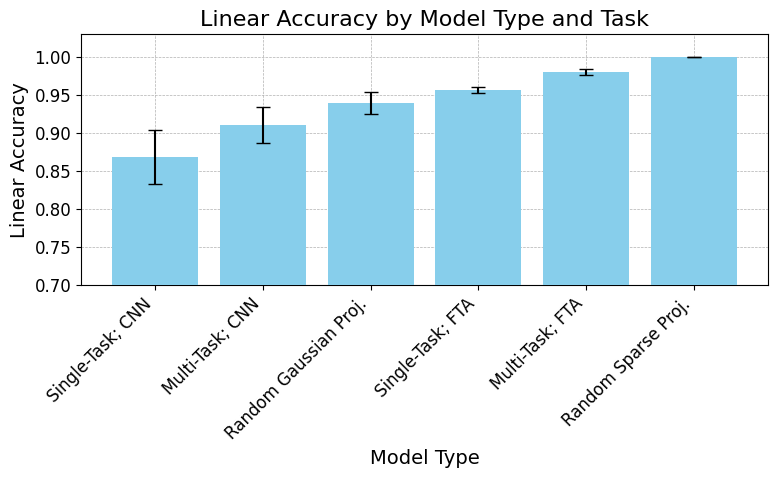

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_35234/1276734571.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')


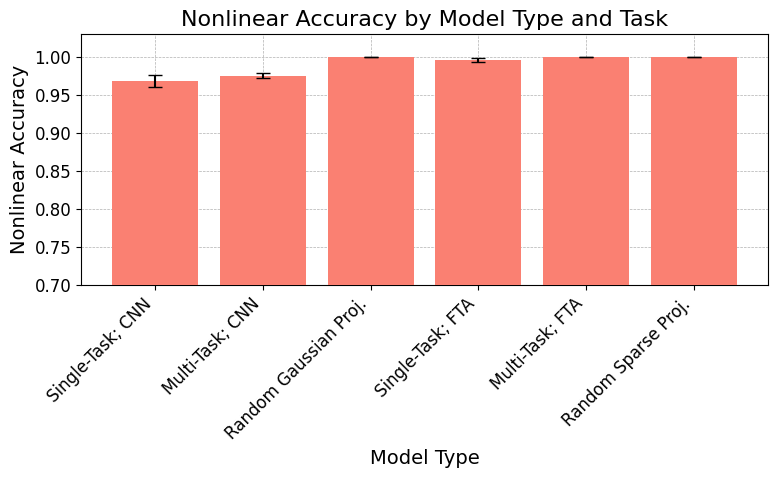

In [20]:
# Reorder DataFrame based on the specified order
order = [
    'Single-Task; CNN', 'Multi-Task; CNN', 'Random Gaussian Proj.',
    'Single-Task; FTA', 'Multi-Task; FTA', 'Random Sparse Proj.']
df_two_rooms_clean['order'] = df_two_rooms_clean['label'].apply(lambda x: order.index(x) if x in order else len(order))
df_two_rooms_clean = df_two_rooms_clean.sort_values('order')

# Increase font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# Plotting for linear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_two_rooms_clean['label'], df_two_rooms_clean['lin_acc_mean'],
       yerr=df_two_rooms_clean['lin_acc_std_err'], capsize=5, color='skyblue',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Linear Accuracy')
ax.set_title('Linear Accuracy by Model Type and Task')
ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.7, 1.03)


plt.tight_layout()
plt.savefig('plots/classifier_res/minigrid_linear_train_OLD2.png')
plt.show()


# Plotting for nonlinear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_two_rooms_clean['label'], df_two_rooms_clean['nonlin_acc_mean'],
       yerr=df_two_rooms_clean['nonlin_acc_std_err'], capsize=5, color='salmon',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Nonlinear Accuracy')
ax.set_title('Nonlinear Accuracy by Model Type and Task')
ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.7, 1.03)


plt.tight_layout()
plt.savefig('plots/classifier_res/minigrid_nonlinear_train_OLD2.png')
plt.show()



### Plot Class Specific accuracies

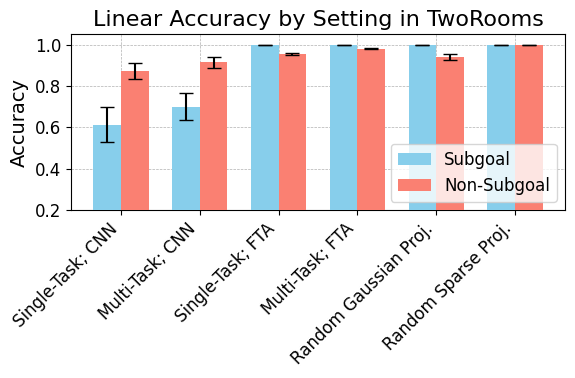

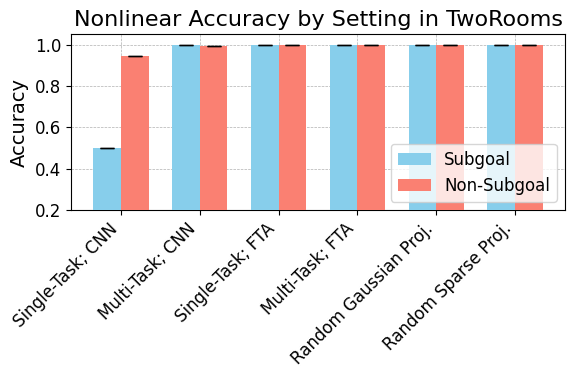

In [21]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# Sample DataFrame including the new measurements
# data = {
#     'label': ['Single-Task; CNN', 'Multi-Task; CNN', 'Random Sparse Proj.; GAUSS', 'Single-Task; FTA', 'Multi-Task; FTA', 'Random Sparse Proj.; SPARSE'],
#     'lin_sg_acc_mean': [0.930510, 0.931547, 0.929585, 0.979789, 0.785619, 0.945169],
#     'lin_sg_acc_std_err': [0.005095, 0.008730, 0.005964, 0.006003, 0.054845, 0.010115],
#     'lin_non_sg_acc_mean': [0.940510, 0.941547, 0.939585, 0.989789, 0.795619, 0.955169],
#     'lin_non_sg_acc_std_err': [0.006095, 0.009730, 0.006964, 0.007003, 0.055845, 0.011115],
#     'nonlin_sg_acc_mean': [0.969481, 0.907300, 0.939623, 0.981458, 0.941335, 0.993467],
#     'nonlin_sg_acc_std_err': [0.002015, 0.003207, 0.007555, 0.010295, 0.010295, 0.007087],
#     'nonlin_non_sg_acc_mean': [0.979481, 0.917300, 0.949623, 0.991458, 0.951335, 1.003467],
#     'nonlin_non_sg_acc_std_err': [0.003015, 0.004207, 0.008555, 0.011295, 0.011295, 0.008087]
# }

# df_two_rooms_clean = pd.DataFrame(data)

# Reorder DataFrame based on the specified order
from numpy import save


order = ['Single-Task; CNN', 'Multi-Task; CNN', 'Random Sparse Proj.; GAUSS', 'Single-Task; FTA', 'Multi-Task; FTA', 'Random Sparse Proj.; SPARSE']
df_two_rooms_clean['order'] = df_two_rooms_clean['label'].apply(lambda x: order.index(x) if x in order else len(order))
df_two_rooms_clean = df_two_rooms_clean.sort_values('order')

# Increase font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# Function to create bar plot
def create_bar_plot(
        y1_mean, y1_err, y2_mean, y2_err, ylabel, title,
        savepath=None, color1='skyblue', color2='salmon'):
#     fig, ax = plt.subplots(figsize=(8, 6))
    fig, ax = plt.subplots(figsize=(6, 4))

    bar_width = 0.35
    index = np.arange(len(df_two_rooms_clean))

    # Bar chart for sg_acc_mean
    bars1 = ax.bar(
        index, df_two_rooms_clean[y1_mean], bar_width,
        yerr=df_two_rooms_clean[y1_err],
        label='Subgoal', capsize=5, color=color1, zorder=3)

    # Bar chart for non_sg_acc_mean
    bars2 = ax.bar(
        index + bar_width, df_two_rooms_clean[y2_mean],
        bar_width, yerr=df_two_rooms_clean[y2_err],
        label='Non-Subgoal', capsize=5, color=color2, zorder=3)

#     ax.set_xlabel('Model Type')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df_two_rooms_clean['label'], rotation=45, ha='right')
    ax.set_ylim(0.2, 1.05)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
    ax.legend(loc='lower right')

    plt.tight_layout()
    if savepath:
       plt.savefig(savepath)
    plt.show()

# Plotting for linear accuracy
create_bar_plot(
    'lin_sg_acc_mean', 'lin_sg_acc_std_err',
    'lin_non_sg_acc_mean', 'lin_non_sg_acc_std_err',
    'Accuracy',
    'Linear Accuracy by Setting in TwoRooms',
    savepath='plots/classifier_res/minigrid_linear_train2.png')


# Plotting for nonlinear accuracy
create_bar_plot(
    'nonlin_sg_acc_mean', 'nonlin_sg_acc_std_err',
    'nonlin_non_sg_acc_mean', 'nonlin_non_sg_acc_std_err',
    'Accuracy',
    'Nonlinear Accuracy by Setting in TwoRooms',
    savepath='plots/classifier_res/minigrid_nonlinear_train2.png')



# Atari

When I ran it, I saw some real weird behaviour for the random projections.


But first, let's look at the actual model:

In [52]:
filesys.set_directory_in_project()
seaquest_results = run_lib.load_existing_results(
    "discovery/class_analysis/atari_RESULTS.pkl")

for setting, data in seaquest_results.items():
    print("setting:", setting)
    print("  num_runs: ", data.num_runs)
    print("  lin_acc_mean +- stderr: ", data.lin_acc_mean, "+-", data.lin_acc_std_err)
    print("  nonlin_acc_mean +- stderr: ", data.nonlin_acc_mean, "+-", data.nonlin_acc_std_err)
    print("  lin_sg_acc: ", data.lin_sg_acc_mean, "+-", data.lin_sg_acc_std_err)
    print("  nonlin_sg_acc: ", data.nonlin_sg_acc_mean, "+-", data.nonlin_sg_acc_std_err)
    print("  lin_non_sg_acc: ", data.lin_non_sg_acc_mean, "+-", data.lin_non_sg_acc_std_err)
    print("  nonlin_non_sg_acc: ", data.nonlin_non_sg_acc_mean, "+-", data.nonlin_non_sg_acc_std_err)



Changed working directory to /Users/szepi1991/Code/discovery
setting: Setting(multitask=False, model_type=<ModelType.CNN: 1>, env_name=<EnvName.Seaquest: 2>)
  num_runs:  6
  lin_acc_mean +- stderr:  0.9696463380673906 +- 0.008038850865909577
  nonlin_acc_mean +- stderr:  1.0 +- 0.0
  lin_sg_acc:  1.0 +- 0.0
  nonlin_sg_acc:  1.0 +- 0.0
  lin_non_sg_acc:  0.9684057971014491 +- 0.008367395205646753
  nonlin_non_sg_acc:  1.0 +- 0.0
setting: Setting(multitask=False, model_type=<ModelType.FTA: 2>, env_name=<EnvName.Seaquest: 2>)
  num_runs:  5
  lin_acc_mean +- stderr:  1.0 +- 0.0
  nonlin_acc_mean +- stderr:  1.0 +- 0.0
  lin_sg_acc:  1.0 +- 0.0
  nonlin_sg_acc:  1.0 +- 0.0
  lin_non_sg_acc:  1.0 +- 0.0
  nonlin_non_sg_acc:  1.0 +- 0.0
setting: Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.Seaquest: 2>)
  num_runs:  10
  lin_acc_mean +- stderr:  0.40785296574770263 +- 0.14275357162462088
  nonlin_acc_mean +- stderr:  0.5921470342522974 +- 0.1427535

In [53]:
df_seaquest = df_with_flat_settings(seaquest_results)
df_seaquest

,multitask,model_type,env_name,wandb_ids,num_runs,lin_accuracies,lin_sg_accuracies,lin_non_sg_accuracies,lin_conf_matrices,lin_acc_mean,...,nonlin_accuracies,nonlin_sg_accuracies,nonlin_non_sg_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err,nonlin_sg_acc_mean,nonlin_sg_acc_std_err,nonlin_non_sg_acc_mean,nonlin_non_sg_acc_std_err
0,False,ModelType.CNN,EnvName.Seaquest,"[mpqgvvr1, itafwycc, o8ec1u1z, gciysixg, 4oje7...",6,"[0.9866332497911445, 0.9598997493734336, 0.950...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[0.9860869565217392, 0.9582608695652174, 0.948...","[[[1134, 16], [0, 47]], [[1102, 48], [0, 47]],...",0.969646,...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[1.0],[1.0],"[[[1150, 0], [0, 47]], [[1150, 0], [0, 47]], [...",1.000000,0.000000,1.0,0.0,1.0,0.0
1,False,ModelType.FTA,EnvName.Seaquest,"[rmfyq9p4, w53h6u4k, 8r01d3y7, gux8ixql, ekqjr...",5,"[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[[[1150, 0], [0, 47]], [[1150, 0], [0, 47]], [...",1.000000,...,"[1.0, 1.0, 1.0, 1.0, 1.0]",[1.0],[1.0],"[[[1150, 0], [0, 47]], [[1150, 0], [0, 47]], [...",1.000000,0.000000,1.0,0.0,1.0,0.0
2,True,ModelType.RANDOM_PROJ_GAUSS,EnvName.Seaquest,"[None, None, None, None, None, None, None, Non...",10,"[0.960735171261487, 0.960735171261487, 0.03926...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[[[1150, 0], [47, 0]], [[1150, 0], [47, 0]], [...",0.407853,...,"[0.960735171261487, 0.03926482873851295, 0.960...",[0.0],[1.0],"[[[1150, 0], [47, 0]], [[0, 1150], [0, 47]], [...",0.592147,0.142754,0.0,0.0,1.0,0.0
3,True,ModelType.RANDOM_PROJ_SPARSE,EnvName.Seaquest,"[None, None, None, None, None, None, None, Non...",10,"[0.03926482873851295, 0.960735171261487, 0.960...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...","[[[0, 1150], [0, 47]], [[1150, 0], [47, 0]], [...",0.500000,...,"[0.03926482873851295, 0.960735171261487, 0.960...",[1.0],[0.0],"[[[0, 1150], [0, 47]], [[1150, 0], [47, 0]], [...",0.500000,0.145697,1.0,0.0,0.0,0.0


In [54]:
label_mapping_seaquest = {
    (False, datatypes.ModelType.FTA): "FTA",
    (False, datatypes.ModelType.CNN): "CNN",
    (True, datatypes.ModelType.FTA): "FTA",
    (True, datatypes.ModelType.CNN): "CNN",
    (True, datatypes.ModelType.RANDOM_PROJ_GAUSS): "Random Gaussian Proj.",
    (True, datatypes.ModelType.RANDOM_PROJ_SPARSE): "Random Sparse Proj.",
}

df_seaquest_clean = clean_df(df_seaquest, label_mapping_seaquest)
df_seaquest_clean

,lin_acc_mean,lin_acc_std_err,lin_sg_acc_mean,lin_sg_acc_std_err,lin_non_sg_acc_mean,lin_non_sg_acc_std_err,nonlin_acc_mean,nonlin_acc_std_err,nonlin_sg_acc_mean,nonlin_sg_acc_std_err,nonlin_non_sg_acc_mean,nonlin_non_sg_acc_std_err,label
0,0.969646,0.008039,1.0,0.000000,0.968406,0.008367,1.000000,0.000000,1.0,0.0,1.0,0.0,CNN
1,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.0,0.0,FTA
2,0.407853,0.142754,0.6,0.154919,0.400000,0.154919,0.592147,0.142754,0.0,0.0,1.0,0.0,Random Gaussian Proj.
3,0.500000,0.145697,0.5,0.158114,0.500000,0.158114,0.500000,0.145697,1.0,0.0,0.0,0.0,Random Sparse Proj.


### Overall Accuracies. Probably not udpated styling

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_17629/2163504085.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')


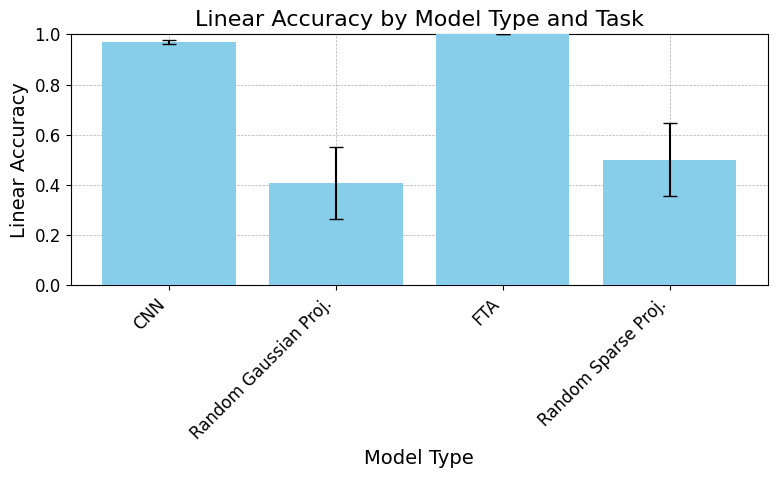

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_17629/2163504085.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')


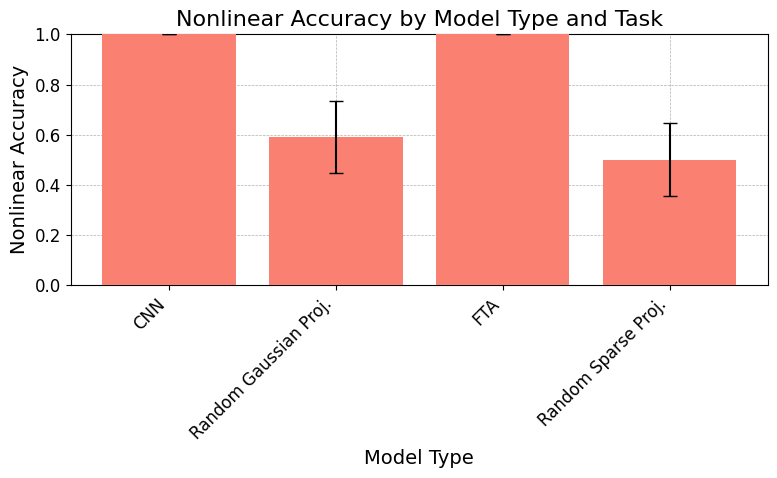

In [55]:
# Reorder DataFrame based on the specified order
order = [
    'CNN', 'Random Gaussian Proj.',
    'FTA', 'Random Sparse Proj.']
df_seaquest_clean['order'] = df_seaquest_clean['label'].apply(lambda x: order.index(x) if x in order else len(order))
df_seaquest_clean = df_seaquest_clean.sort_values('order')

# Increase font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# Plotting for linear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_seaquest_clean['label'], df_seaquest_clean['lin_acc_mean'],
       yerr=df_seaquest_clean['lin_acc_std_err'], capsize=5, color='skyblue',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Linear Accuracy')
ax.set_title('Linear Accuracy by Model Type and Task')
ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.show()

# Plotting for nonlinear accuracy
fig, ax = plt.subplots(figsize=(8, 5))

ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
ax.bar(df_seaquest_clean['label'], df_seaquest_clean['nonlin_acc_mean'],
       yerr=df_seaquest_clean['nonlin_acc_std_err'], capsize=5, color='salmon',
       zorder=3)

ax.set_xlabel('Model Type')
ax.set_ylabel('Nonlinear Accuracy')
ax.set_title('Nonlinear Accuracy by Model Type and Task')
ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.show()

### Per class accuracies. Updated.

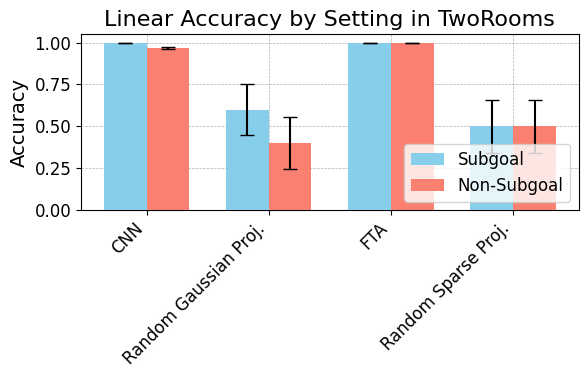

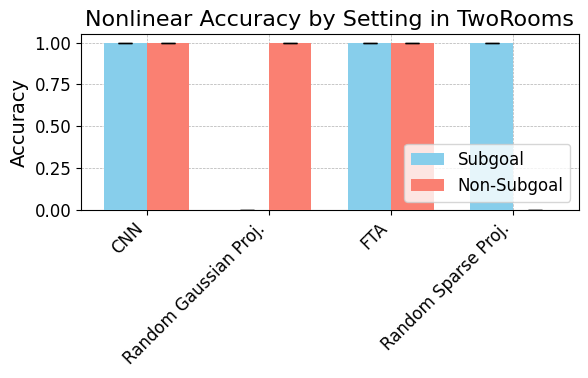

In [60]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# Sample DataFrame including the new measurements
# data = {
#     'label': ['Single-Task; CNN', 'Multi-Task; CNN', 'Random Sparse Proj.; GAUSS', 'Single-Task; FTA', 'Multi-Task; FTA', 'Random Sparse Proj.; SPARSE'],
#     'lin_sg_acc_mean': [0.930510, 0.931547, 0.929585, 0.979789, 0.785619, 0.945169],
#     'lin_sg_acc_std_err': [0.005095, 0.008730, 0.005964, 0.006003, 0.054845, 0.010115],
#     'lin_non_sg_acc_mean': [0.940510, 0.941547, 0.939585, 0.989789, 0.795619, 0.955169],
#     'lin_non_sg_acc_std_err': [0.006095, 0.009730, 0.006964, 0.007003, 0.055845, 0.011115],
#     'nonlin_sg_acc_mean': [0.969481, 0.907300, 0.939623, 0.981458, 0.941335, 0.993467],
#     'nonlin_sg_acc_std_err': [0.002015, 0.003207, 0.007555, 0.010295, 0.010295, 0.007087],
#     'nonlin_non_sg_acc_mean': [0.979481, 0.917300, 0.949623, 0.991458, 0.951335, 1.003467],
#     'nonlin_non_sg_acc_std_err': [0.003015, 0.004207, 0.008555, 0.011295, 0.011295, 0.008087]
# }

# df_seaquest_clean = pd.DataFrame(data)

# Reorder DataFrame based on the specified order
from numpy import save

order = [
    'CNN', 'Random Gaussian Proj.',
    'FTA', 'Random Sparse Proj.']

df_seaquest_clean['order'] = df_seaquest_clean['label'].apply(lambda x: order.index(x) if x in order else len(order))
df_seaquest_clean = df_seaquest_clean.sort_values('order')

# Increase font sizes
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

# Function to create bar plot
def create_bar_plot(
        y1_mean, y1_err, y2_mean, y2_err, ylabel, title,
        savepath=None, color1='skyblue', color2='salmon'):
#     fig, ax = plt.subplots(figsize=(8, 6))
    fig, ax = plt.subplots(figsize=(6, 4))

    bar_width = 0.35
    index = np.arange(len(df_seaquest_clean))

    # Bar chart for sg_acc_mean
    bars1 = ax.bar(
        index, df_seaquest_clean[y1_mean], bar_width,
        yerr=df_seaquest_clean[y1_err],
        label='Subgoal', capsize=5, color=color1, zorder=3)

    # Bar chart for non_sg_acc_mean
    bars2 = ax.bar(
        index + bar_width, df_seaquest_clean[y2_mean],
        bar_width, yerr=df_seaquest_clean[y2_err],
        label='Non-Subgoal', capsize=5, color=color2, zorder=3)

#     ax.set_xlabel('Model Type')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')
    ax.set_ylim(0, 1.05)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
    ax.legend(loc='lower right')

    plt.tight_layout()
    if savepath:
       plt.savefig(savepath)
    plt.show()

# Plotting for linear accuracy
create_bar_plot(
    'lin_sg_acc_mean', 'lin_sg_acc_std_err',
    'lin_non_sg_acc_mean', 'lin_non_sg_acc_std_err',
    'Accuracy',
    'Linear Accuracy by Setting in TwoRooms',
    savepath='plots/classifier_res/seaquest_linear_train2.png')


# Plotting for nonlinear accuracy
create_bar_plot(
    'nonlin_sg_acc_mean', 'nonlin_sg_acc_std_err',
    'nonlin_non_sg_acc_mean', 'nonlin_non_sg_acc_std_err',
    'Accuracy',
    'Nonlinear Accuracy by Setting in TwoRooms',
    savepath='plots/classifier_res/seaquest_nonlinear_train2.png')



### Explanation of random proj behaviour

On different seeds, either all are identified as subgoals or all are identified as non-subgoals. Could see this from the confusion matrix.

Indeed, for the random ones the accuracy is bad, and it's because it is all over the place:

```
Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_GAUSS: 3>, env_name=<EnvName.Seaquest: 2>)
    no runs for this setting yet, need {num_seeds_needed} more.
     linear acc: 0.9652880430221558
    nonlin acc: 0.9652880430221558
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.9652880430221558
    nonlin acc: 0.034711964428424835
     linear acc: 0.9652880430221558
    nonlin acc: 0.9652880430221558

Adding sparse random projections for EnvName.Seaquest
Setting(multitask=True, model_type=<ModelType.RANDOM_PROJ_SPARSE: 4>, env_name=<EnvName.Seaquest: 2>)
    no runs for this setting yet, need {num_seeds_needed} more.
     linear acc: 0.9652880430221558
    nonlin acc: 0.034711964428424835
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.9652880430221558
    nonlin acc: 0.034711964428424835
     linear acc: 0.034711964428424835
    nonlin acc: 0.9652880430221558
     linear acc: 0.034711964428424835
    nonlin acc: 0.034711964428424835

```

A whole bunch of times it does not train.

MAYBE TODO: I could try one thing: I will fix the random projection and run just randomizing over the classifier initialization and batching.


In [9]:
df_seaquest = df_with_flat_settings(seaquest_results)
df_seaquest

,multitask,model_type,env_name,wandb_ids,num_runs,lin_accuracies,lin_conf_matrices,lin_acc_mean,lin_acc_std_err,nonlin_accuracies,nonlin_conf_matrices,nonlin_acc_mean,nonlin_acc_std_err
0,False,ModelType.CNN,EnvName.Seaquest,[Seaquest-v5_mpqgvvr1],1,[0.9849624060150376],"[[[1132, 18], [0, 47]]]",0.984962,0.000000,[1.0],"[[[1150, 0], [0, 47]]]",1.000000,0.000000
1,True,ModelType.RANDOM_PROJ_GAUSS,EnvName.Seaquest,"[None, None, None, None, None, None, None, Non...",10,"[0.03926482873851295, 0.960735171261487, 0.960...","[[[0, 1150], [0, 47]], [[1150, 0], [47, 0]], [...",0.777611,0.116748,"[0.960735171261487, 0.03926482873851295, 0.039...","[[[1150, 0], [47, 0]], [[0, 1150], [0, 47]], [...",0.592147,0.142754
2,True,ModelType.RANDOM_PROJ_SPARSE,EnvName.Seaquest,"[None, None, None, None, None, None, None, Non...",10,"[0.960735171261487, 0.960735171261487, 0.03926...","[[[1150, 0], [47, 0]], [[1150, 0], [47, 0]], [...",0.776441,0.116558,"[0.960735171261487, 0.03926482873851295, 0.039...","[[[1150, 0], [47, 0]], [[0, 1150], [0, 47]], [...",0.407853,0.142754


In [10]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.RANDOM_PROJ_GAUSS].lin_conf_matrices
)

[[array([[   0, 1150],
         [   0,   47]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1119,   31],
         [   2,   45]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[1150,    0],
         [  47,    0]])]]

In [11]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.RANDOM_PROJ_GAUSS].nonlin_conf_matrices
)

[[array([[1150,    0],
         [  47,    0]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[1150,    0],
         [  47,    0]])]]

In [12]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.RANDOM_PROJ_SPARSE].nonlin_conf_matrices
)

[[array([[1150,    0],
         [  47,    0]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[   0, 1150],
         [   0,   47]]),
  array([[1150,    0],
         [  47,    0]]),
  array([[1150,    0],
         [  47,    0]])]]

In [13]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.CNN].nonlin_conf_matrices
)

[[array([[1150,    0],
         [   0,   47]])]]

In [14]:
list(df_seaquest.loc[
    df_seaquest.model_type == datatypes.ModelType.CNN].nonlin_acc_mean
)

[1.0]

,lin_acc_mean,lin_acc_std_err,nonlin_acc_mean,nonlin_acc_std_err,label
0,0.984962,0.000000,1.000000,0.000000,CNN
1,0.777611,0.116748,0.592147,0.142754,Random Gaussian Proj.
2,0.776441,0.116558,0.407853,0.142754,Random Sparse Proj.


/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_17629/2163504085.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')


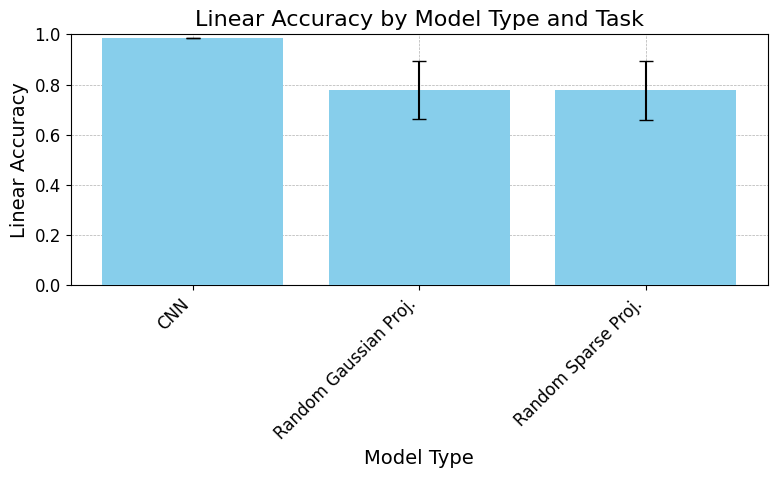

/var/folders/xt/69nn93l959l31g_3b686nmsr0000gn/T/ipykernel_17629/2163504085.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_seaquest_clean['label'], rotation=45, ha='right')


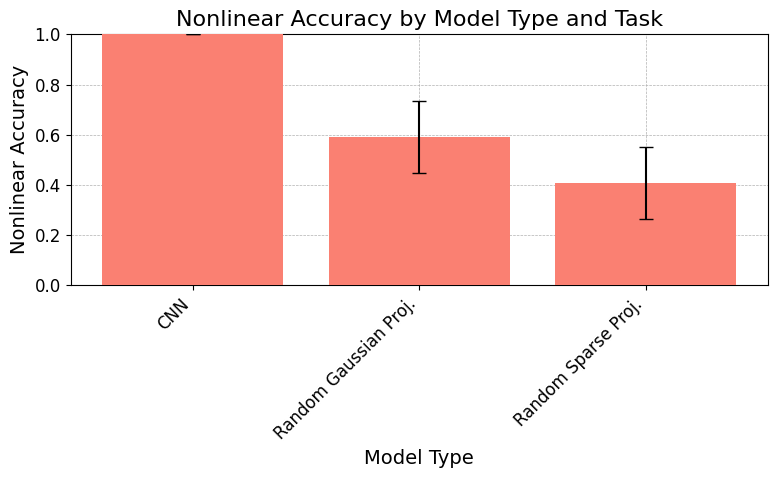